In [123]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic_2d
from numba import njit
import importlib
import galaxy

In [87]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [138]:
# gals = {}
for snap in tqdm(np.arange(0, 400+1)):
    if snap in gals.keys():
        continue
    
    try:
        gals[snap] = galaxy.Galaxy(basepath + 'runs/MW7_GSE4/lvl5-denscut-Ngb64-steep1-instenrich/output', 
                               snap, orient=False)
    except:
        print('loaded to snap=', snap-1)
        break

 34%|███▍      | 137/401 [00:02<00:04, 57.43it/s] 

loaded to snap= 136


In [145]:
sfr = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-Ngb64-steep1-instenrich/output/sfr.txt')
_, indices = np.unique(sfr[:,0], return_index=True)
sfr = sfr[sorted(indices)]

instenrich = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-Ngb64-steep1-instenrich/output/instenrich.txt')
_, indices = np.unique(instenrich[:,0], return_index=True)
instenrich = instenrich[sorted(indices)]

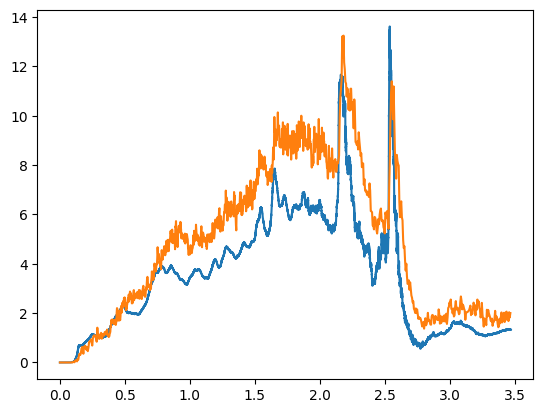

In [146]:
plt.plot(sfr[:,0], sfr[:,2])
plt.plot(instenrich[:,0], 5*np.sum(instenrich[:,1:], axis=1))

/tmp/ipykernel_2569641/3975654714.py:4: RuntimeWarning: invalid value encountered in divide
  plt.scatter(instenrich[:,0], np.log10(instenrich[:,6+1]/instenrich[:,8+1]), s=3, alpha=alpha)


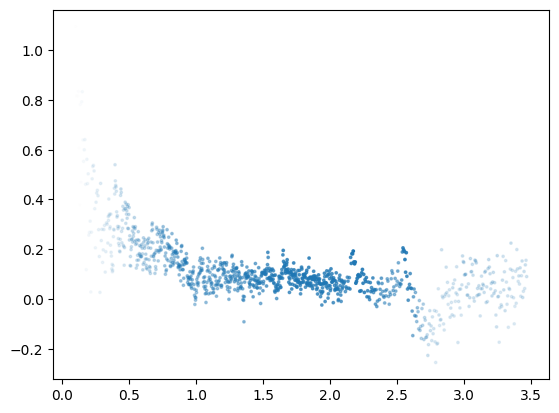

In [147]:
# plt.plot(sfr[:,0], sfr[:,2])
totrate = np.sum(instenrich[:,1:], axis=1)
alpha = totrate / np.max(totrate)
plt.scatter(instenrich[:,0], np.log10(instenrich[:,6+1]/instenrich[:,8+1]), s=3, alpha=alpha)
# plt.ylim(0, 15)

In [148]:
snap_list = np.array(list(gals.keys()))
Mdotmetals = np.zeros((len(snap_list), 10))
Time = np.zeros(len(snap_list))
Menc0_list = np.zeros(len(snap_list))
Mdotmetals_old = np.zeros((len(snap_list), 10))

rcut = 8

for i,snap in enumerate(snap_list):
    sn = gals[snap].sn
    sub = gals[snap].sub

    Time[i] = sn.Time.value
    
    pos0 = sn.part0.pos.value - sub.SubhaloPos[0]
    r0 = np.linalg.norm(pos0, axis=1)
    
    Menc0_list[i] = np.sum(sn.part0.mass.value[r0 < rcut])
    
    if sn.NumPart_Total[4] == 0:
        continue
        
    pos4 = sn.part4.pos.value - sub.SubhaloPos[0]
    r4 = np.linalg.norm(pos4, axis=1)
    
    key = np.logical_and(sn.part4.GFM_StellarFormationTime > 0, r4 < rcut)
    Mdotmetals[i] = np.sum(sn.part4.GFM_InstMetals[key], axis=0)
    
    key = np.logical_and((sn.Time.value - sn.part4.GFM_StellarFormationTime) > 0.05, key)
    Mdotmetals_old[i] = np.sum(sn.part4.GFM_InstMetals[key], axis=0)
    

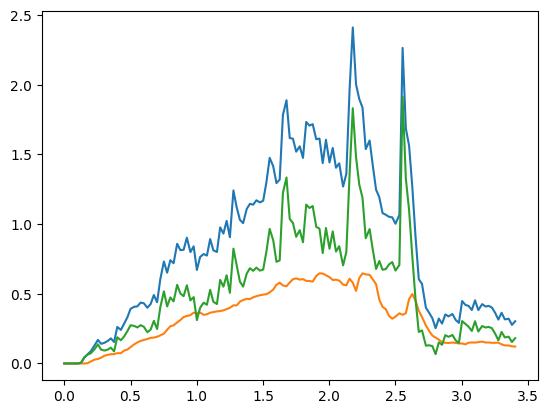

In [149]:
plt.plot(Time, np.sum(Mdotmetals, axis=1))
plt.plot(Time, np.sum(Mdotmetals_old, axis=1))
plt.plot(Time, np.sum(Mdotmetals - Mdotmetals_old, axis=1))

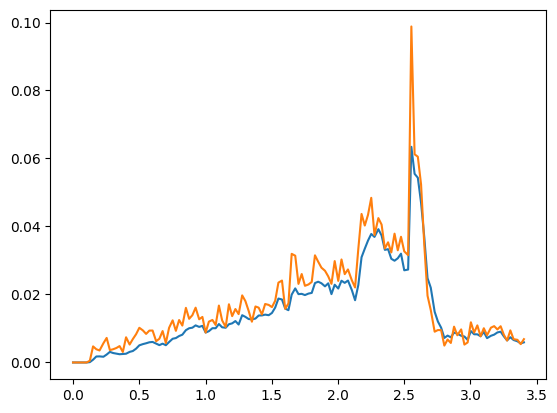

In [151]:
plt.plot(Time, Mdotmetals[:,8]/Menc0_list)
plt.plot(Time, Mdotmetals[:,6]/Menc0_list)
# plt.plot(Time, np.sum(Mdotmetals[:,2:], axis=1)/Menc0_list)

/tmp/ipykernel_2569641/3047594489.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(Time, np.log10(Mdotmetals[:,6]/Mdotmetals[:,8]))


(-0.3, 0.75)

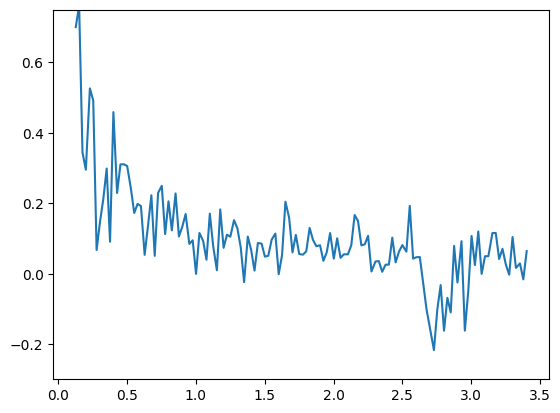

In [152]:
plt.plot(Time, np.log10(Mdotmetals[:,6]/Mdotmetals[:,8]))
plt.ylim(-0.3, 0.75)

In [ ]:
isntmet = np.genfromtxt(